In [1]:
import os
import math
import csv
from glob import glob
from copy import deepcopy
from nptdms import TdmsFile
import pandas as pd
import numpy as np
import multiprocessing as mp
import time
import matplotlib.dates as mdates
from obspy import UTCDateTime
from datetime import datetime, timedelta
import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt 
import pickle 
from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import pchip_interpolate
from lxml import etree
from lxml.etree import XMLSyntaxError
from dts_funcs import * 

In [ ]:
# %% Process a directory of DTS data for EGS Collab 4850 files
# dts_list = [] 
for path,subdir,files in sorted(os.walk('/home/spri902/EGS_Collab/4850/DTS/raw/')):
    for sd in sorted(subdir):
        well_data = read_XTDTS_dir(os.path.join(path,sd),wells_4850,'4850',4)
        print(f'Finished directory :  {sd}')
        with open(f'{sd}_dts.pkl', 'wb') as f:
            pickle.dump(well_data,f)
        # dts_list.append(well_data)
    

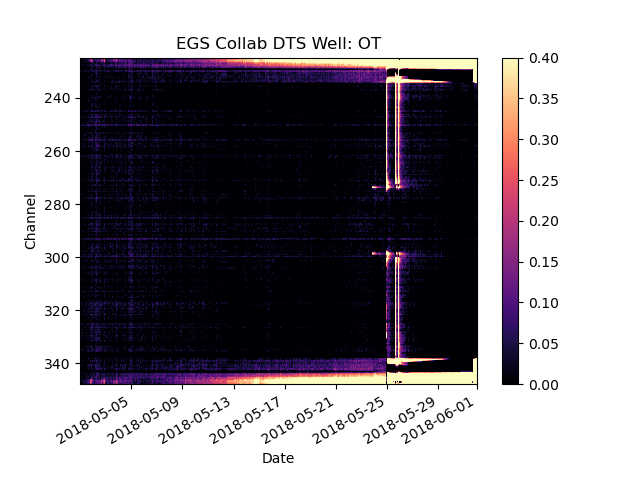

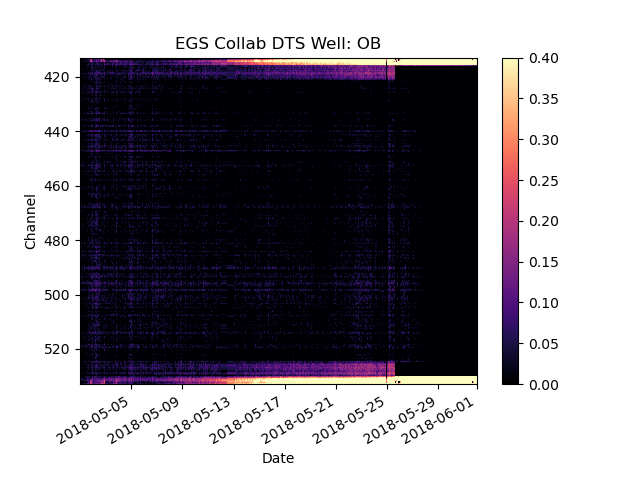

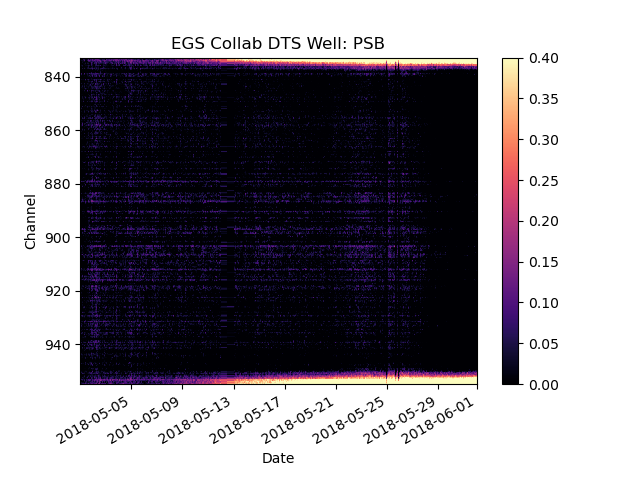

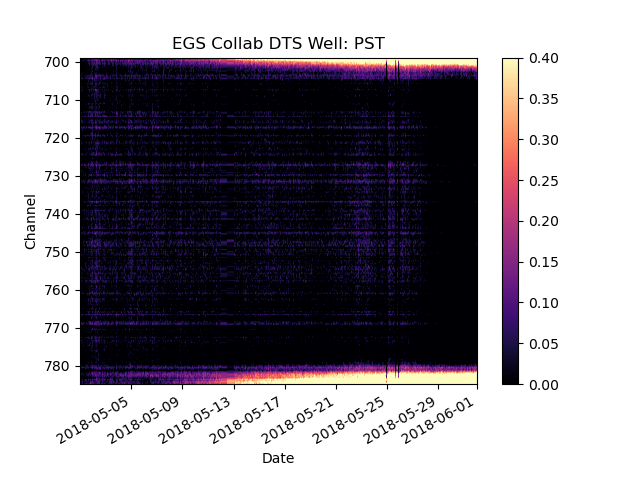

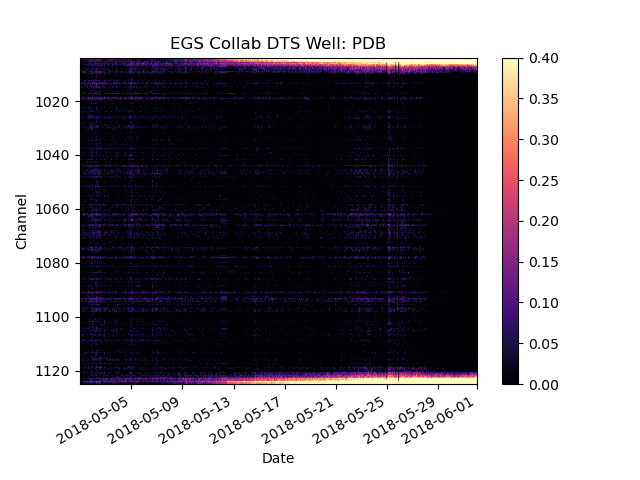

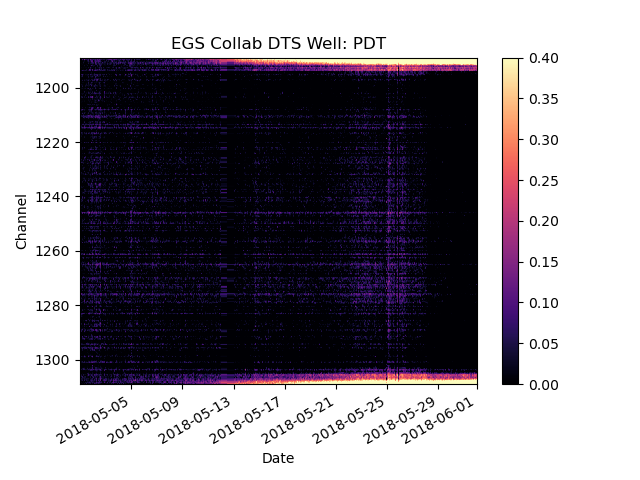

In [2]:
# Plot processed DTS images  
dts_list=[]
for path,subdir,files in sorted(os.walk('/home/spri902/EGS_Collab/4850/DTS/processed/data')):
    for file in sorted(files):
        with open(os.path.join(path,f'{file}'),'rb') as f:
            well_dict = pickle.load(f)
            dts_list.append(well_dict)
for i in range(len(wells_4850)):    
    plot_DTS(dts_list,well=wells_4850[i])

In [ ]:
# %%
# ot_chans = np.r_[225:348]
# ob_chans = np.r_[413:533]
# pst_chans = np.r_[699:785]
# psb_chans = np.r_[833:955]
# pdb_chans = np.r_[1004:1125]
# pdt_chans = np.r_[1189:1309]


# dts_chans= [225,348,413,533,699,785,833,955,1004,1125,1189,1309]
# datfolder=sorted(os.listdir('/home/spri902/EGS_Collab/DTS/processed/'))
# df_all=[]
# dtsdates=[]
# for i in range(len(datfolder)):
#     for path,subdir,files in sorted(os.walk(f'/home/spri902/EGS_Collab/DTS/processed/{datfolder[i]}')):
#         os.chdir(path)
#         dates = [name.split('_')[1] for name in files]
#         dates = [datetime.strptime(d,'%Y%m%d%H%M%S%f') for d in sorted(dates)]
#         df_day=(pd.concat((pd.read_csv(f,header=0) for f in files if f.endswith('csv')),axis=1))

#     df_all.append(df_day)  
#     dtsdates.append(dates)
    
# df_all=pd.concat(df_all,axis=1)    
# dtsdates = [item for sublist in dtsdates for item in sublist]
# df_tmp = df_all.TMP
# xlims = mdates.date2num(dtsdates)
# ylims = df_all.iloc[:,0]

In [41]:
np.shape(dts_list[20]['PDB']['data'])


(476, 144)

In [ ]:
fig,ax = plt.subplots()
for d in np.arange(len(dts_list)):
    plt.plot(dts_list[d]['PDB']['data'][358,:])